In [ ]:
try:
  import torch
  import torchvision
  assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0])==2, "torch version"
  assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version"
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")
except:
  print(f"[INFO] torch/torchvision versions not as required, installing nightly versions")
  !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__} ")

torch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

try:
  from torchinfo import summary

except:
  print(f"[INFO] torchinfo not found... downloading and installing")
  !pip install -q torchinfo
  from torchinfo import summary

try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
  print(f"[INFO] going_modular or helper functions not found... downloading and installing")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytoch-deep-learning/helper_functions.py .
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [ ]:
train_dir = image_path/"train"
test_dir = image_path/"test"

In [ ]:
IMG_SIZE=224

manual_transform = transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                       transforms.ToTensor()])


In [ ]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform = manual_transform,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7dfe6aae1280>,
 ['pizza', 'steak', 'sushi'])

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image.shape, label


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


(torch.Size([3, 224, 224]), tensor(1))

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

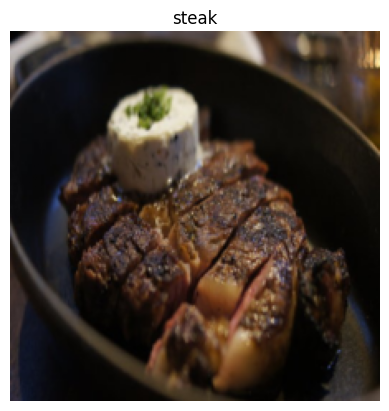

In [ ]:
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)

In [ ]:
height = 224
width = 224
color_channels = 3
patch_size = 16

number_of_patches = int((height * width) /patch_size**2)
print(f"Number of patches(N) with image height(H={height}), width (W={width}) and patch size (P={path_size}): {number_of_patches}")


Number of patches(N) with image height(H=224), width (W=224) and patch size (P=16): 196


In [ ]:
embedding_layer_input_shape = (height, width, color_channels)

embedding_layer_output_shape = (number_of_patches, patch_size **2 * color_channels)

print(f"Input of shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output of shape (single 2D image): {embedding_layer_output_shape}")

Input of shape (single 2D image): (224, 224, 3)
Output of shape (single 2D image): (196, 768)


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

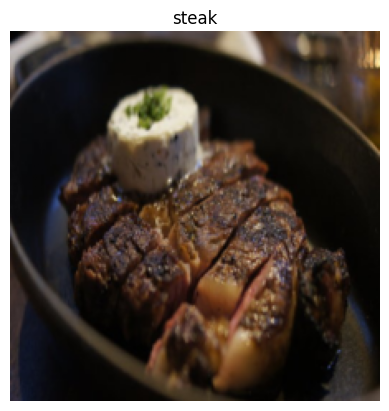

In [ ]:
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)


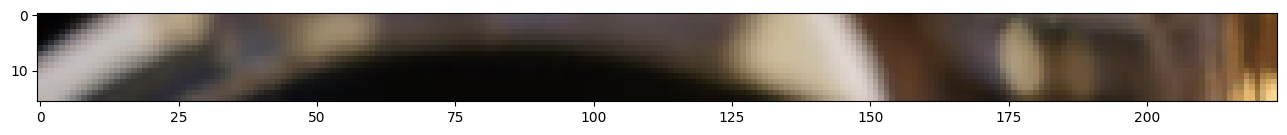

In [ ]:
image_permuted = image.permute(1, 2, 0)

patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

Number of patches per row: 14.0 
Patche size: 16 pixels x 16 pixels


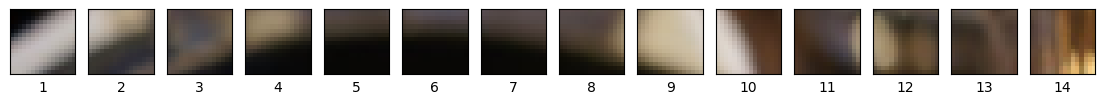

In [ ]:
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches} \nPatche size: {patch_size} pixels x {patch_size} pixels")

fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size,
                        figsize = (num_patches, num_patches),
                        sharex=True,
                        sharey=True)

for i, patch in enumerate(range(0, img_size, patch_size)):
  axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]);
  axs[i].set_xlabel(i+1)
  axs[i].set_xticks([])
  axs[i].set_yticks([])



Number of patches per row: 14.0 
Patche size: 16 pixels x 16 pixels


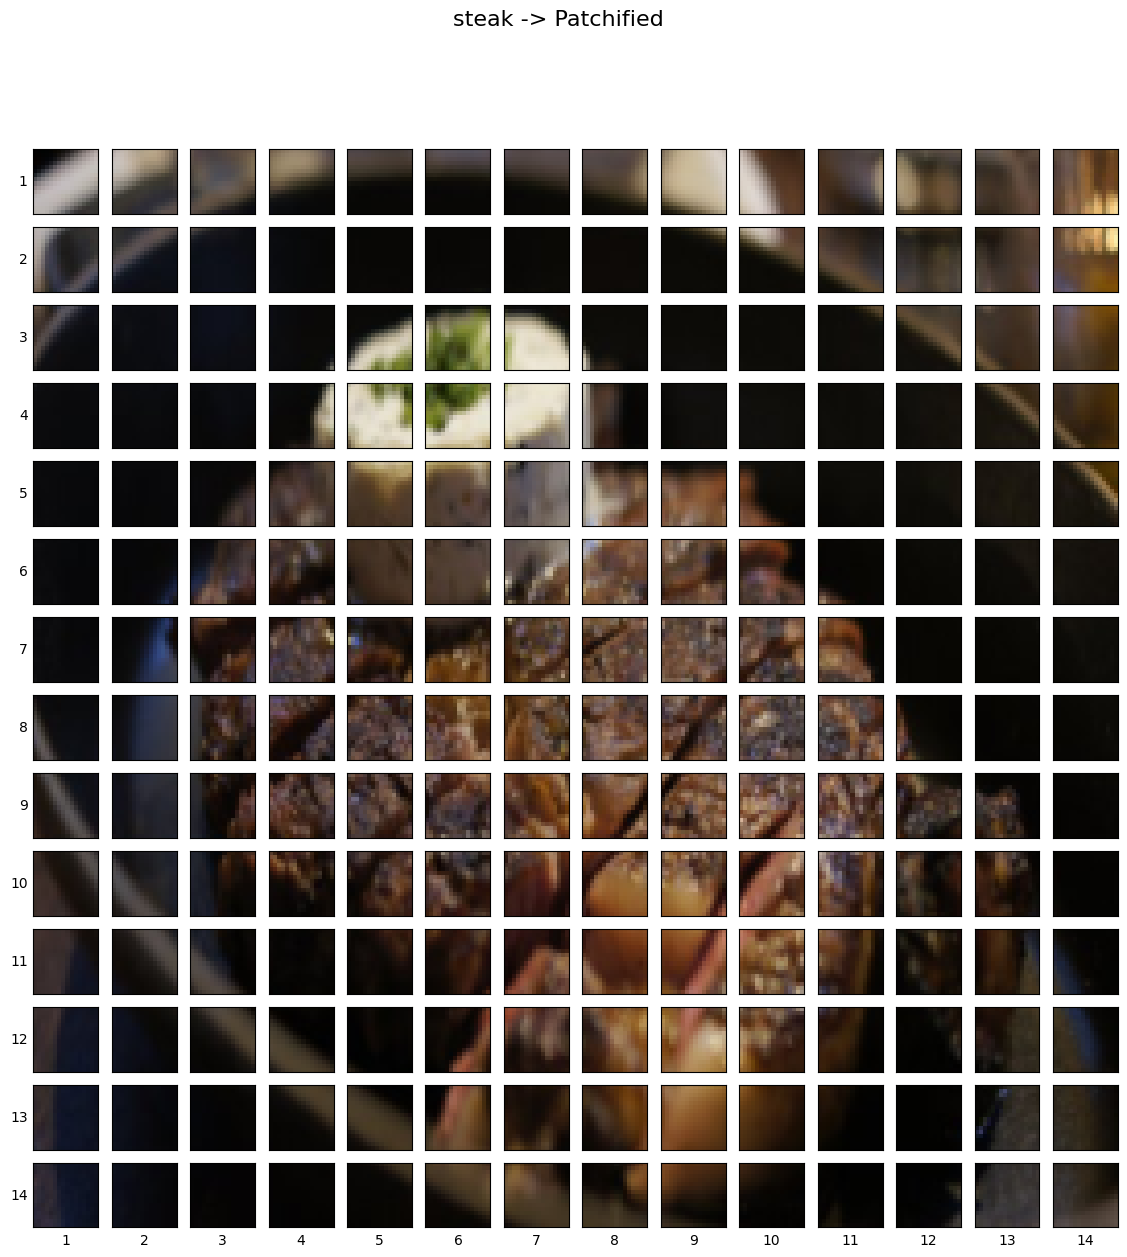

In [ ]:
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches} \nPatche size: {patch_size} pixels x {patch_size} pixels")

fig, axs = plt.subplots(nrows=img_size // patch_size,
                        ncols=img_size // patch_size,
                        figsize = (num_patches, num_patches),
                        sharex=True,
                        sharey=True)

for i, patch_height in enumerate(range(0, img_size, patch_size)):
  for j, patch_width in enumerate(range(0, img_size, patch_size)):
    axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size,
                                    patch_width:patch_width+patch_size,:])

    axs[i,j].set_ylabel(i+1,
                        rotation="horizontal",
                        horizontalalignment="right",
                        verticalalignment="center")
    axs[i,j].set_xlabel(j+1)
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    axs[i,j].label_outer()

fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()



In [ ]:
from torch import nn

patch_size = 16

conv2d= nn.Conv2d(in_channels=3,
                  out_channels=768,
                  kernel_size=patch_size,
                  stride=patch_size,
                  padding=0)

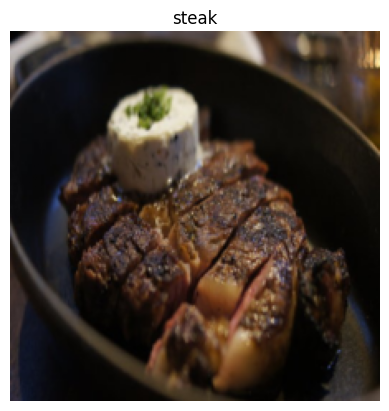

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [ ]:
image_out_of_conv = conv2d(image.unsqueeze(0))
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Showing random convolutional features maps from indexes


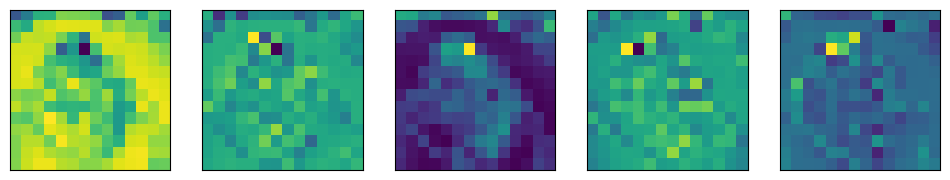

In [ ]:
import random
random_indexes = random.sample(range(0, 758), k=5)
print(f"Showing random convolutional features maps from indexes")

fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(12,12))

for i, idx in enumerate(random_indexes):
  image_conv_feature_map = image_out_of_conv[:, idx, :, :]
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
  axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [ ]:
single_feature_map = image_out_of_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[ 5.9118e-02, -4.0235e-01, -5.1489e-02, -2.5163e-01, -1.5745e-01,
           -1.6854e-01, -1.7126e-01, -2.2973e-01, -4.9120e-01, -6.6075e-03,
           -2.0368e-01, -7.8435e-02, -1.7359e-01, -2.8284e-01],
          [-2.1208e-01, -1.3291e-01, -3.2577e-02, -3.0939e-03,  2.2977e-03,
           -2.1156e-03, -1.8197e-03, -3.3259e-05, -2.2166e-02, -2.4191e-01,
           -8.9086e-02, -5.2875e-02, -1.1158e-01, -3.0393e-01],
          [-8.5584e-02, -3.1006e-02, -4.1052e-02, -5.9047e-02,  2.1689e-01,
           -3.2315e-01, -5.1807e-02,  9.5820e-02, -5.5242e-03, -2.6768e-03,
           -1.5113e-02, -1.7152e-01, -9.1340e-02, -1.2782e-01],
          [-1.3713e-02, -1.6268e-02, -1.0556e-02, -3.1451e-01, -3.5656e-01,
           -3.0115e-02, -4.3364e-01,  1.9254e-02, -2.1353e-02, -3.5444e-03,
           -6.3255e-03, -2.5766e-02, -9.1269e-02, -1.1090e-01],
          [-6.1046e-03, -8.8895e-03, -9.2564e-02, -5.8073e-02, -2.8098e-01,
           -1.8941e-01, -3.0213e-01,  4.1223e-02, -9.4793e-0

In [ ]:
print(f"Current tensor shape:{image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]")

Current tensor shape:torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]


In [ ]:
flatten = nn.Flatten(start_dim=2,
                     end_dim=3)

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Image flattened shape: torch.Size([1, 768, 196])


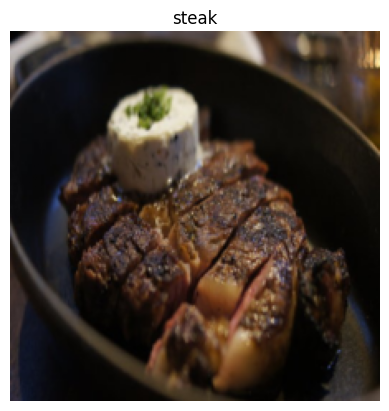

In [ ]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
print(f"Original image shape: {image.shape}")

image_out_of_conv = conv2d(image.unsqueeze(0))
print(f"Image feature map shape: {image_out_of_conv.shape}")

image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Image flattened shape: {image_out_of_conv_flattened.shape}")



In [ ]:
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0,2,1)
print(f"Path embedding shape:{image_out_of_conv_flattened_reshaped.shape} -> [batch, num_patches, embedding_size]")

Path embedding shape:torch.Size([1, 196, 768]) -> [batch, num_patches, embedding_size]


(np.float64(-0.5), np.float64(195.5), np.float64(0.5), np.float64(-0.5))

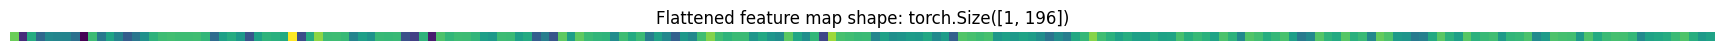

In [ ]:
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:, :, 0]

plt.figure(figsize=(22,22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False)

In [ ]:
single_flattened_feature_map, single_flattened_feature_map.requires_grad, single_flattened_feature_map.shape

(tensor([[ 5.9118e-02, -4.0235e-01, -5.1489e-02, -2.5163e-01, -1.5745e-01,
          -1.6854e-01, -1.7126e-01, -2.2973e-01, -4.9120e-01, -6.6075e-03,
          -2.0368e-01, -7.8435e-02, -1.7359e-01, -2.8284e-01, -2.1208e-01,
          -1.3291e-01, -3.2577e-02, -3.0939e-03,  2.2977e-03, -2.1156e-03,
          -1.8197e-03, -3.3259e-05, -2.2166e-02, -2.4191e-01, -8.9086e-02,
          -5.2875e-02, -1.1158e-01, -3.0393e-01, -8.5584e-02, -3.1006e-02,
          -4.1052e-02, -5.9047e-02,  2.1689e-01, -3.2315e-01, -5.1807e-02,
           9.5820e-02, -5.5242e-03, -2.6768e-03, -1.5113e-02, -1.7152e-01,
          -9.1340e-02, -1.2782e-01, -1.3713e-02, -1.6268e-02, -1.0556e-02,
          -3.1451e-01, -3.5656e-01, -3.0115e-02, -4.3364e-01,  1.9254e-02,
          -2.1353e-02, -3.5444e-03, -6.3255e-03, -2.5766e-02, -9.1269e-02,
          -1.1090e-01, -6.1046e-03, -8.8895e-03, -9.2564e-02, -5.8073e-02,
          -2.8098e-01, -1.8941e-01, -3.0213e-01,  4.1223e-02, -9.4793e-02,
           4.4362e-02, -7

In [ ]:
class PatchEmbedding(nn.Module):
  def __init__(self,
               in_channels:int=3,
               patch_size:int=16,
               embedding_dim:int=768):
    super().__init__()

    self.patcher = nn.Conv2d(in_channels=in_channels,
                             out_channels=embedding_dim,
                             kernel_size=patch_size,
                             stride=patch_size,
                             padding=0)
    self.flatten = nn.Flatten(start_dim=2,
                              end_dim=3)

  def forward(self,x):
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}"

    x_patched = self.patcher(x)
    x_flattened = self.flatten(x_patched)

    return x_flattened.permute(0,2,1)


In [ ]:
set_seeds()

patchify =PatchEmbedding(in_channels=3,
                         patch_size=16,
                         embedding_dim=768)

print(f"Input image shape:{image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0))
print(f"Shape:{patch_embedded_image.shape}")

Input image shape:torch.Size([1, 3, 224, 224])
Shape:torch.Size([1, 196, 768])


In [ ]:
# batch_size = patch_embedded_image.shape